In [1]:
import time
import datetime
import pytz
import glob

import numpy as np
import pandas as pd

import pylab
from colour import Color
from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from bigbang import listserv
from bigbang.listserv import ListservArchive, ListservList, ListservMessageParser
from bigbang.analysis.listserv import ListservArchive as MArchive
from bigbang.analysis.listserv import ListservList as MList

plt.style.use("publication_jcap.mplstyle")

In [8]:
mlist_name = "3GPP_TSG_SA_WG4"
mlist = ListservList.from_mbox(
    name=mlist_name,
    filepath=f"/home/christovis/AGE/datactive/bigbang-archives/3GPP/{mlist_name}.mbox",
)
df_mlist = mlist.to_pandas_dataframe(include_body=False)

dic_msg = MList.get_messagecount_per_domain(
    df_mlist, percentage=False
)  # , contract=0.03)
dic_mem = MList.get_localpart_per_domain(df_mlist)

dic = {"aff": [], "mem": [], "msg": []}
for key in dic_mem.keys():
    dic["aff"].append((".").join(key.split(".")[:-1]))
    dic["mem"].append(dic_mem[key])
    dic["msg"].append(dic_msg[key])

dic["mem"] = np.asarray([len(mem) for mem in dic["mem"]])
dic["msg"] = np.asarray(dic["msg"])

3 7


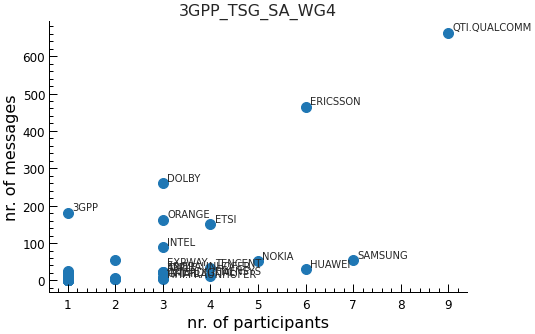

In [9]:
fig, ax = plt.subplots()

ax.scatter(
    dic["mem"],
    dic["msg"],
)

mem_max = np.max(dic["mem"])
msg_max = np.max(dic["msg"])

check_dupl = []
for s, x, y in zip(dic["aff"], dic["mem"], dic["msg"]):
    if (x / mem_max > 0.3) or (y / msg_max > 0.1):
        if (x, y) in check_dupl:
            print(x, y)
            ax.annotate(s, (x + (mem_max * 0.01), y + (msg_max * 0.05)), fontsize=10)
        else:
            check_dupl.append((x, y))
            ax.annotate(s, (x + (mem_max * 0.01), y + (msg_max * 0.01)), fontsize=10)

ax.set_xlabel("nr. of participants")
ax.set_ylabel("nr. of messages")
ax.set_title(mlist_name)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

plt.show()